# Audio Pre-processing

The following code is based on this [video lecture](https://www.youtube.com/watch?v=Oa_d-zaUti8)

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display

In [3]:
# load our file (Windows Only)
file = "Critical Hit. (Sound Effect).mp3"

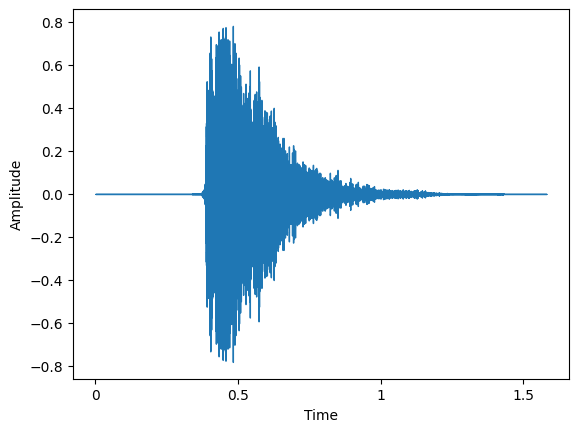

In [4]:
# look at the sound wave
signal, sr = librosa.load(file, sr=22050) # sr = sample rate
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# basic fft
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
freq = np.linspace(0, sr, len(magnitude))
# by Shannon-Nyquist the fft is symmetric about halfway through the spectrum
left_freq = freq[:len(freq)//2]
left_mag = magnitude[:len(magnitude)//2]

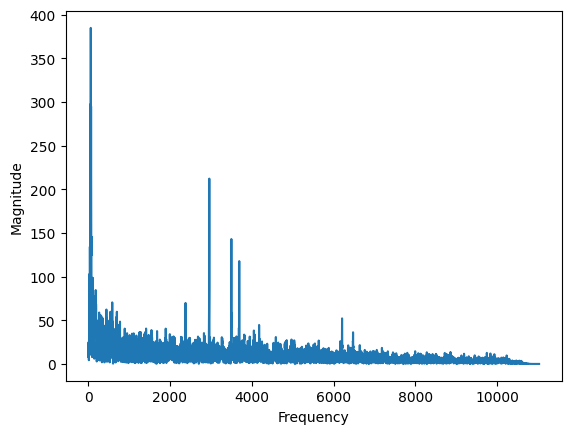

In [10]:
# plot the frequency domain
plt.plot(left_freq, left_mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [7]:
# short term fourier transform (stft) for generating spectogram
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

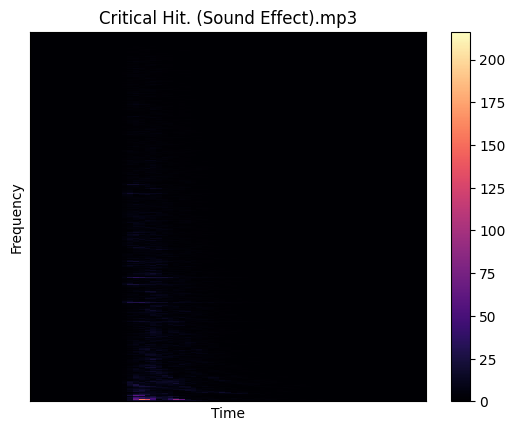

In [11]:
# use stft to create spectrogram
spectrogram = np.abs(stft)
# convert to decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.title(file)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

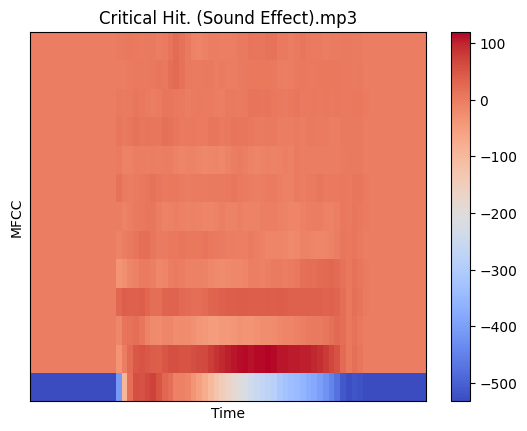

In [9]:
# Extract Mel-Frequency Cepstrum Coefficients (MFCC)
MFCCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.title(file)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()